In [2]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [4]:
# Helpful
import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *
from src.utils.data_split import *
from src.models.EMOS import *
from src.models.EMOS_global.EMOS_global_load_score import *
from src.models.EMOS_global.EMOS_global_load_model import *
import data.raw.load_data_raw as ldr
import data.processed.load_data_processed as ldp
import data.processed.load_data_processed_denormed as ldpd
from src.models.CRPS_baseline.CRPS_load import *

<IPython.core.display.Javascript object>

### 1. Load scores

In [5]:
EMOS_glob_scores_t2m = EMOS_global_load_score("t2m")
# EMOS_glob_scores_ws10 = EMOS_global_load_score("ws10")

<IPython.core.display.Javascript object>

###  2. EMOS global scores worse with lead_time?

#### 2.1 t2m - visualization

In [7]:
def lead_time_score(score):
    scores = []
    for i in range(len(score)):
        scores.append(score[i].mean())
    fig, ax = plt.subplots()
    ax.scatter(range(31), scores)
    ax.set_title("Lead_time - mean_score")
    ax.set_xlabel("lead_time")
    ax.set_ylabel("mean_score")
    plt.show()

<IPython.core.display.Javascript object>

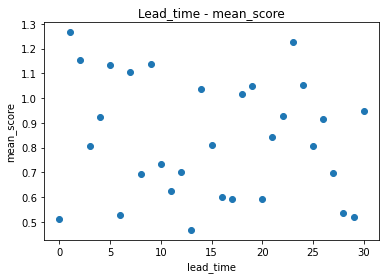

<IPython.core.display.Javascript object>

In [8]:
lead_time_score(EMOS_glob_scores_t2m)